# किस्किट की सहायता से प्रमात्रा अभिकलन एवम प्रमात्रा यंत्र अधिगम
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Quantum Computing and Quantum Machine Learning with Qiskit

प्रमात्रा अभिकलन क्या है और इसका उपयोग यंत्र अधिगम में कैसे किया जा सकता है? जानकारी के पहाड़ों में अत्यंत जटिल प्रतिरूप खोजने का तरीका अब प्रमात्रा यंत्र अधिगम नामक क्षेत्र का उद्देश्य है।

यह क्षेत्र मेरे अध्ययन के दो सबसे पसंदीदा क्षेत्रों को मिलाता है: अभिकलन और भौतिकी, और यहां मैं अध्ययन के इस क्षेत्र को अधिक से अधिक लोगों द्वारा बेहतर रूप से ज्ञात करने का प्रयास करता हूं।

हम पायथन और किस्किट का उपयोग करेंगे।


-------------------------------------------------------------------------------------
\\




What is quantum computing and how can it be used in machine learning, the method of finding extremely complex patterns in the mountains of information is now the aim of a field called quantum machine learning.

This field combines two of my favorite fields of study: computation and physics, and here I try to make this field of study better known by as many people as possible.

We will be using Python and Qiskit.



प्रमात्रा यांत्रिकी और प्रमात्रा अभिकलन के पीछे का विचार तीन अवधारणाओं पर आधारित है:

१. अवस्था का अध्यारोपण: क्यूबिट न तो $|0\rangle$ अवस्था में है,  और न ही $|1\rangle$ अवस्था में है , क्यूबिट मिश्रित अवस्था में है , जिसे अवस्था का अध्यारोपण कहा जाता है। इस बात को ध्यान में रखें कि यह धारणा कि यह एक ही समय में $|0\rangle$ और $|1\rangle$ अवस्था में है, गलत है। निकाय एक ऐसी अवस्था में है जो आधार अवस्था $|0\rangle$ और $|1\rangle$ से बनता है।


२. व्यतिकरण: अवस्थाओं को एक दूसरे  (या खुद )  पे परस्पर प्रभाव करवा कर  वांछित स्वरूप (वह जो हमारी समस्या का उत्तर रखता है) को मजबूत किया जाता है जबकि अन्य स्वरूप रद्द कर दिए जाते हैं।


३. संलिप्तता : अवस्थाओं के बीच एक अत्यंत मजबूत संबंध जो  चिरसम्मत भौतिकी में नहीं हो सकता। इसके कारण, दो कण जब वे एक दूसरे पर परस्पर प्रभाव डालते हैं, तो उसके बाद संलिप्त रहते हैं । इस संलिप्त  स्थिति का अर्थ है कि उनके अवस्थाओं को इस तरह से समूहीकृत किया जाता है कि उनका व्यक्तिगत रूप से प्रतिनिधित्व नहीं किया जा सकता है।


----------------------------------------------------------------------
Quantum Mechanics & Quantum Computing
The idea behind quantum computing is based in three concepts:

1. Superposition of states: the Qubit is neither in the $|0\rangle$ or $|1\rangle$ state but in a mixed state called superposition of states. Bare in mind that the notion that it is at the same time in the $|0\rangle$  and $|1\rangle$ state is wrong. The system is in a state that is formed from the basis states $|0\rangle$   and  $|1\rangle$ .

2. Interference: is the possibility of making states interact with one another (or with themselves) in such a way that the desired pattern (the one that holds the answer for our problem) is reinforced while the other patterns are cancelled out.
3. Entanglement: an extremely strong correlation between states that cannot happen in classical physics. Because of it, two particles when they interact with one another remain entangled after that. This entangled state means that their states are grouped in such a way that they cannot be represented individually.


### आवश्यक पायथन संकुल आयात करना
------------------------------------------------------------------
### Importing Necessary python packges

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### पायथन और किस्किट रूपरचना

-------------------------------------------------
#### Python and Qiskit Setup

इस अध्ययन/पाठ्यक्रम में हमारा उद्देश्य प्रमात्रा अभिकलन के जरिए यंत्र अधिगम करना है। इसे सम्पादित करने के लिए प्रमात्रा परिपथ द्वारा अभ्यासों की एक श्रृंखला को हल किया जाएगा। किस्किट के अलावा, तीन पैकेज का भारी उपयोग किया जाएगा: पांडा, स्किकिट-लर्न और कुटिप। 

----------------------------------------------------------------------

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. Besides qiskit, three libraries will be heavily used: pandas, scikit-learn and qutip. 


In [ ]:
!pip install qutip -q
!pip install qiskit -q
!pip install qiskit[visualization] -q
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src -q

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import qutip as qt 
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk
import qiskit as qk

 ### प्रमात्रा द्वयंक

 #### सिद्धांत

 प्रमात्रा यांत्रिकी में हम एक या एक से अधिक कणों की अवस्थाओं को समझने में रुचि रखते हैं।  अवस्था  एक ऐसी चीज है जिसे बाद में एक पर्यवेक्षक  द्वारा मापा जाएगा। यह कण की गति, स्थिति, द्रव्यमान, प्रचक्रण, आदि हो सकता है ... इस अधिनियम से प्राप्त जानकारी का उपयोग "हमारी" दुनिया में किसी उद्देश्य के लिए किया जा सकता है।

 अभिकलन में हम कणों के बारे में बात करने के बजाय द्वयंक के बारे में बात करते हैं।

द्वयंक एक कण के लिए एक मॉडल है। एक कण की तरह इसकी अवस्थाएँ होती हैं। 

 माप पर आपको दो संभावित परिणामों में से एक देंगे। एक अतिसूक्ष्म परमाणु का चक्कर एक उदाहरण है (यह +१ या -१ हो सकता है)। एक अन्य उदाहरण एक फोटॉन का ध्रुवीकरण समक्षेत्र है |

-------------------------------------------------------
 ### Qubit

 #### Theory

 In quantum mechanics, we are interested in understanding the states of one or more particles. State is something that will be measured later by an observer. It can be the particle's speed, position, mass, spin, etc... The information obtained from this act can be used for some purpose in "our" world.

 In computing, we talk about bits instead of particles.

Bits is a model for a particle. Like a particle it has states.

 On measurement , it will give you one of two possible outcomes. An example is the rotation of an electron (it can be +1 or -1). Another example is the polarization plane of a photon.




## **अभ्यास १  : एक प्रमात्रा द्वयंक बनाना**

इस उदाहरण में, हम एक प्रमात्रा द्वयंक बनाएंगे $|\psi_0⟩$, उसे $|0\rangle$ अवस्था में डालेंगे और उसे मापेंगे। 

हम गणितीय अभ्यावेदन के साथ भी काम कर रहे हैं। $|0⟩$ अवस्था एक सदिश  है, जिसका मान $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ है| इसी तरह $|1⟩$ का मान $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ है|


------------------------------------------------------------------
## **Ex. 1 : Creating a qubit**

In this example we will create a qubit $|\psi_0⟩$ 
, put it in the state $|0⟩$ and measure it.

We are also working with the mathematical respresentations. The state $|0⟩$ is a vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and the state $|1\rangle$ is also a vector, represented by $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 

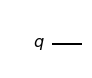

In [ ]:
# Remember that qiskit has to be already installed in the Python environment.
# Otherwise the import command will fail
import qiskit as qk

# A circuit composed of just one qubit
qc = qk.QuantumCircuit(1)
qc.draw('mpl')

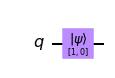

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

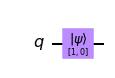

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

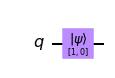

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()

# Let's choose the statevector simulator from the Aer backend
backend = qk.Aer.get_backend('statevector_simulator')

# And execute the circuit qc in the simulator backend 
#  getting as final result the counts from 1.000 measures
#  of the qubit state
result = qk.execute(qc, backend, shots=1000).result().get_counts()
result

{'0': 1000}

प्रमात्रा अभिकलन एक संभाव्य गणना पद्धति है| प्रमात्रा परिपथ चलाने के लिए, हमें बैकएंड चुनना होगा। बैकएंड स्थानीय अनुकारक या वास्तविक प्रमात्रा अभिकलित्र हो सकता है।


--------------------------------------------------------------------

Quantum Computing is a probabilistic computation method. To run a quantum circuit, we must chose a backend. The backend can be local simulator, or a real quantum computer.


अब, हम प्रमात्रा परिपथ  को १000 बार चलाना चाहते हैं। नीचे दिया गया रेखाचित्र परिणामों का एक आयत चित्र प्रस्तुत करता है

--------------------------------------------------------------
Now, we want to run the quantum circuit 1000 times. The graph below presents a histogram of the results

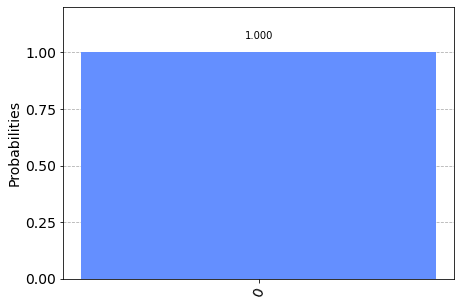

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_histogram(result)

प्रमात्रा परिपथ बनाने का दूसरा तरीका नीचे प्रस्तुत किया गया है। इसमें, हम प्रमात्रा द्वयंक,  द्वयंक बनाते हैं और माप के परिणाम द्वयंक में संग्रहीत होते हैं।



-------------------------------------------------------
Another way of creating the quantum circuit is presented below. In it, we create quantum registers (qubits), classical registers (bits) and the results from the qubit measurement are stored in the classical register (the bit).

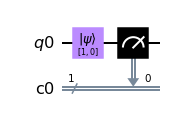

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.measure(0,0)
qc.draw('mpl')

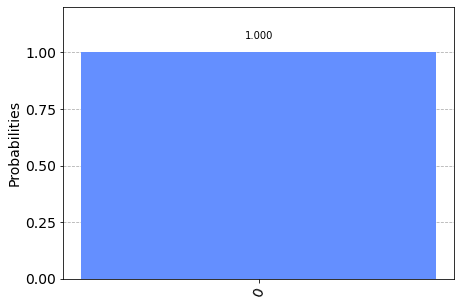

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_histogram(result)

## **अभ्यास २ : एक परिपथ  बनाएं जो एक प्रमात्रा द्वयंक $|0⟩$ प्राप्त करता है और इसे $|1⟩$ स्थिति में रखता है**

याद रखें कि अवस्था $|0⟩$ और $|1⟩$ को सदिश द्वारा भी दर्शाया जा सकता है , $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ तथा $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

हम $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ सदिश को सर्किट में रखना चाहते हैं और इस $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ सदिश को वापस पाना चाहते हैं|

गणितीय दृष्टिकोण से, हम एक और आव्यूह $X$ चाहते हैं, जिसे $|0⟩$ से गुणा करने पर परिणामस्वरूप $|1⟩$ मिलता है।
वह आव्यूह है:

$X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

प्रमात्रा परिपथ परिप्रेक्ष्य से, एक आव्यूह जो संचालित और संशोधित करता है उसे गेट/तर्कद्वार कहा जाता है। 
नॉट गेट 

--------------------------------------------------------------

## **Ex.2: Create a circuit which receives a qubit in the state $|0⟩$  and puts it in the state $|1⟩$.**

Remember that the states $|0\rangle$ and $|1\rangle$ can be represented as $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$? 
We want in this exercise is a way of putting a matrix $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in the circuit and getting back the matrix $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$. 

From a purely mathematical perspective what we want is another matrix $X$ which when multilied by $|0\rangle$ gives as a result $|1\rangle$.
Or in other words $|1\rangle = X |0⟩$. Which matrix is that?

The answer is $X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

From a quantum circuit persepective, a matrix that operates in a qubit and modifies it is called a gate. The $X$ matrix depicted here represent the $NOT$ gate

In [ ]:
import numpy as np
v0 = np.array([[1],[0]]);v0

array([[1],
       [0]])

In [ ]:
v1 = np.array([[0],[1]]); v1

array([[0],
       [1]])

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
X.dot(v0)

array([[0],
       [1]])

In [ ]:
X.dot(v1)

array([[1],
       [0]])

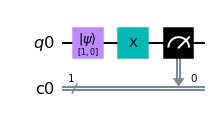

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,"q0")
cr = qk.ClassicalRegister(1,"c0")
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.measure(qr[0], cr[0])
qc.draw('mpl')

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=1000).result().get_counts()
results

{'1': 1000}

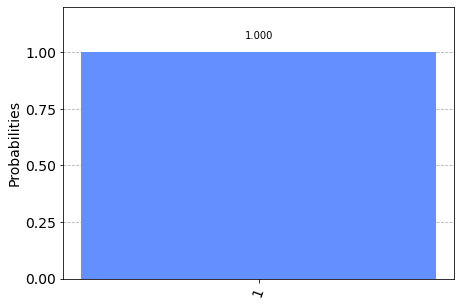

In [ ]:
qk.visualization.plot_histogram(results)

एक्स संकारक यदि दो बार लागू किया जाता है, तो यह परिणाम को फिर से उलट देगा।
आव्यूह के दृष्टिकोण से, इसका अर्थ है
$X⋅X⋅|0⟩ = |0⟩$ या $X^2 ⋅ |0⟩ = |0⟩$.
दूसरे शब्दों में $X^2 = I$. 
जहाँ X को पहचान संकारक कहा जाता है




--------------------------------------------------------------------


Note that the $X$ operator if applied twice in a qubit will reverse the result again. From a matrix perspective, it means $X⋅X⋅|0⟩ = |0⟩$ or $X^2 ⋅ |0⟩ = |0⟩$. In other words $X^2 = I$ where $I$ is called Idenity Matrix

In [ ]:
import numpy as np
# Notice that we are creating the v0 matrix using the transpose operation
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
# Here it is created again de X matrix 
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
# Multiplying v0 by the X matrix twice you get again v0
X.dot(X).dot(v0)

array([[1],
       [0]])

In [ ]:
# Multiplying the X matrix by itself you get the Identity matrix
X.dot(X)

array([[1, 0],
       [0, 1]])

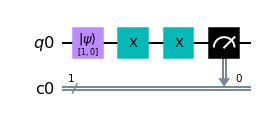

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.x(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

In [ ]:
# The result of 1000 measures of the qubit above gives the |0> state as result
#  in all measures
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
results

{'0': 1000}

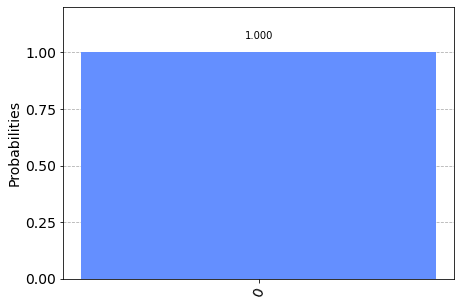

In [ ]:
qk.visualization.plot_histogram(results)


## **अभ्यास ३ : $|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle +  \frac{1}{\sqrt{2}} |1\rangle$ अवस्था में एक प्रमात्रा द्वयंक शुरू करें और परिणाम प्रस्तुत करें**



जब आप एक प्रमात्रा द्वयंक  को नहीं देख रहे हैं, तो यह एक सिक्के की तरह है जो अभी भी घूम रहा है। प्रमात्रा द्वयंक की स्थिति को $|\psi\rangle = a|0\rangle + b|1\rangle$ द्वारा दर्शाया जा सकता है, जहां $|a|^2 + |b|^2 = 1$ , एवं $ a $ , $b$ संबंधित आधार अवस्था $|0\rangle$, $|1\rangle$ को मापने की संभावनाएं हैं| चूँकि $a^2 = \frac{1}{2}$, $|0\rangle$ मापने की प्रायिकता 50% है, इसी तरह $|1\rangle$ के मापने की प्रायिकता भी 50% है.
इसलिए इस उदाहरण में, यदि हम $10$ माप निष्पादित करते हैं, तो हम उम्मीद करते हैं कि लगभग $5$ माप $|0⟩$ में और $5$ माप $|1⟩$ आधार अवस्था में दिखाई देंगे। नीचे दिया गया परिपथ इस प्रयोग को दर्शाता है



----------------------------------------------------------------

## **Ex.3: Initialize a qubit in the state $|ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ + \frac{1}{\sqrt{2}} |1⟩$ and present the results of $1.000$ measures.**

Remember that a qubit, when you're not looking at it, is like a coin that is still spinning. The state that this qubit it can be represented by $|\psi⟩ = a |0⟩ + b |1⟩$, with $|a|^2 + |b|^2 = 1 $, where $a$ and $b$ are the probabilities of measuring the associated base states $|0⟩$ and $|1⟩$ respectively. Since $a^2 = \frac{1}{2}$ the probability of measuring $|0⟩$ is $50\%$ and same for $|1⟩$. Therefore in this example, if we execute $10$ measurements, we expect to see approximately $5$ measures in $|0\rangle$ and $5$ measures in $|1⟩$ base state respectively. The circuit below depicts this experiment.

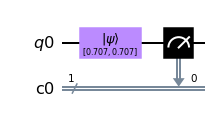

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,2**-0.5],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

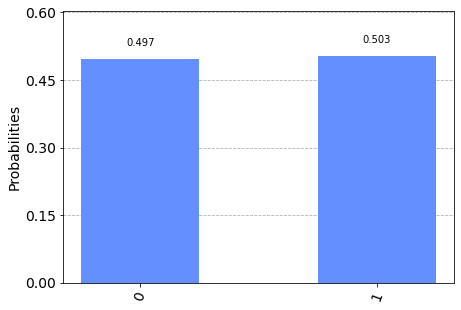

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

अवस्था $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$  में प्रमात्रा द्वयंक को प्रारंभिक स्थापन करने की प्रक्रिया को दूसरे गेट का उपयोग करके भी पूरा किया जा सकता था।
यह गेट $|0\rangle$ अवस्था में प्रमात्रा द्वयंक प्राप्त करेगा और $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$ अवस्था का उत्पाद करेगा।
यह हैडामर्ड गेट है। $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ , अगर हम गणना करें
$ H⋅ |0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} ⋅\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$

-------------------------------------------------------------------------------------------

The process of initializing the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$ could also have been accomplished using another gate. This gate would recieve a qubit in state $|0\rangle$ and output the state $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$.

That gate would be hadamard gate. Call it $H$, where $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$. If we calculate:
$ H⋅ |0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} ⋅\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$

आइए इस संक्रिया को numpy . में विस्तार  करें

---------------------------------------------------
Let's deploy this operation in numpy

In [ ]:

 import numpy as np
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
H.dot(v0)

array([[0.707],
       [0.707]])

.. और फिर प्रमात्रा परिपथ के माध्यम से, जैसा कि आप देख सकते हैं, माप का आयतचित्र समान है

------------------------------------------------------------------
.. and then through a quantum circuit. As you can see, the histogram of measurements is the same

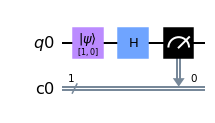

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw('mpl')

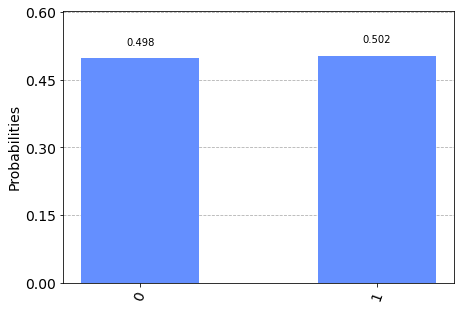

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

##**अभ्यास ४ : $|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle -  \frac{1}{\sqrt{2}} |1\rangle$ अवस्था में एक प्रमात्रा द्वयंक शुरू करें और परिणाम प्रस्तुत करें**

जब हमने अपनी प्रमात्रा अध्यारोपन स्थिति को परिभाषित किया और कहा कि संभाव्यता आयाम $a$ और $b$ भी एक काल्पनिक संख्या हो सकती है।
क्या होगा यदि $b$ एक ऋणात्मक संख्या हो| 
हमारे माप का परिणाम क्या होगा?

परिणाम पिछले अभ्यास के समान ही होगा, क्योंकि $|\frac{-1}{\sqrt{2}}|^2 = \frac{1}{2}$.
आइए हम एक प्रमात्रा परिपथ  बनाएं और पता करें

-------------------------------------------------------------------------

## **Ex.4 : Initialize a qubit in the state $|\psi⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$ and present the result**

When we defined our qubit's superposition state and said that the probabilities amplitudes $a$ and $b$ could also be any complex number. What if $b$ is a negative number , lie $-1$? What would we measure?

The result would be same as well, because $|\frac{-1}{\sqrt{2}}|^2 = \frac{1}{2}$. Let us create a quantum circuit and find out.

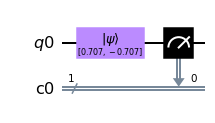

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

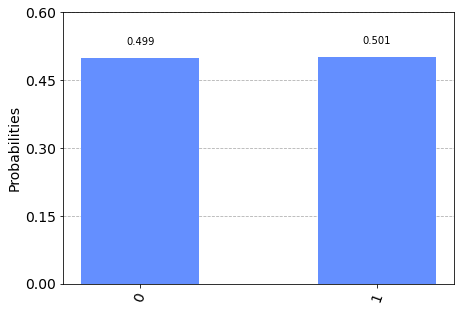

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए एक और प्रयोग करें| हम अवस्था $|Ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$ में प्रमात्रा द्वयंक से शुरू करते हैं। हम इसे एक $H$ गेट से गुजारते हैं और फिर इसे मापते हैं।
परिणाम क्या होगा?

--------------------------------------------------------------------
Let's make another experiment. We start with the qubit in the state $|Ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$. We pass it through an $H$ gate and then we measure it. 
What's going to be the result

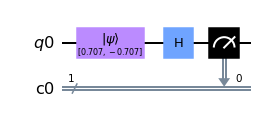

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

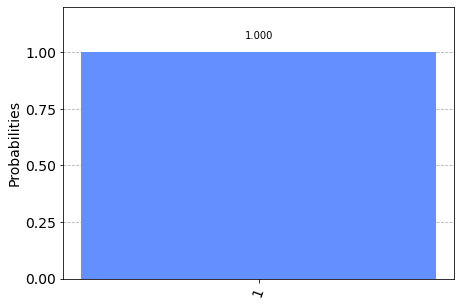

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

परिणामी अवस्था $|Ψ⟩ = |1⟩$ है|

इसका मतलब यह है कि यदि हम अवस्था   $|1⟩$  में प्रमात्रा द्वयंक से शुरू करते हैं और इसे $H$ गेट से दो बार गुजारते करते हैं, तो हमें $|1⟩$ वापस मिलेगा।
आइए अपनी समझ को जांचने के लिए एक और परिपथ बनाएं


-----------------------------------------------------------------
The resulting state is $|Ψ⟩ = |1⟩$. This means that if we start with the qubit in the state $|1⟩$ and pass it through an $H$ gate twice, we will get back to $|1⟩$. Let's create another circuit to check our understanding.

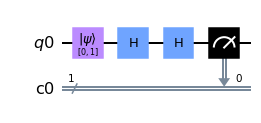

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.h(0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

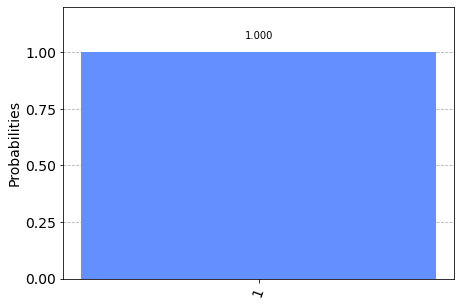

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए हम इसे आव्यूह का उपयोग करके जांचें

------------------------------------------------
Let us check the same with matrices using numpy

In [ ]:
import numpy as np

# First let's start with the qubit in the state |psi> = (|0> - |1>)/sqrt(2)
psi = np.array([[1,-1]]).T/(2**0.5); psi

array([[ 0.707],
       [-0.707]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5; H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# Now let's pass the qubit Psi through an Hadamard gate. 
# The result is a qubit in the state |1>
H.dot(psi)

array([[0.],
       [1.]])

In [ ]:
# Let's start with a qubit in the state |1>, pass it through a
#  a hadamard gate twice and check the result
v0 = np.array([[0,1]]).T; v0

array([[0],
       [1]])

In [ ]:
H.dot(H).dot(v0)

array([[-0.],
       [ 1.]])

In [ ]:
# This means that if we multiply the H gate by itself the result 
#  will be an Identity matrix. Let's check it.
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

##**अभ्यास ५ :  दो प्रमात्रा द्वयंक से शुरू करें, प्रत्येक $|0\rangle$ अवस्था में और परिणामों को मापें। मैट्रिसेस संक्रियाओं के माध्यम से उत्तर की जाँच करें।**


-------------------------------------------------
##**Ex.5: Start with two qubits, each one in the state $|0⟩$ and measure the results. Check the answer through matrices operation**

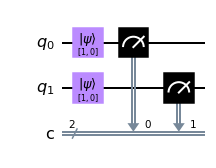

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.measure(qr,cr)
qc.draw('mpl')

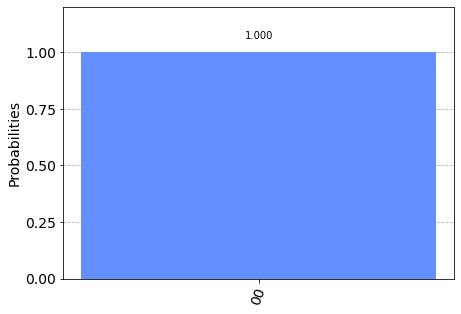

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

ध्यान दें कि परिणाम अब अवस्था  $|00\rangle$ है| इसका मतलब यह है कि दो प्रमात्रा द्वयंक  अब एक मिश्रित अवस्था में हैं| इस राज्य का प्रतिनिधित्व है:
$|\psi⟩ = a |00⟩ + b |01⟩ + c |10⟩ + d |11⟩$ जहां $|a|^2 + |b|^2 + |c|^2 + |d|^2$  है
पहली प्रमात्रा द्वयंक को $|\psi_1⟩   = a_1 |0⟩ + b_1|1⟩$ द्वारा प्रस्तुत किया जा सकता है|  दूसरा प्रमात्रा द्वयंक $|\psi_2⟩   = a_2 |0⟩ + b_2|1⟩$ |

परिपथ में परिणामी प्रमात्रा द्वयंक, प्रदिश गुणनफल नामक एक संक्रिया का परिणाम होगा।
इस संक्रिया को $|\psi_1⟩$ और $|\psi_2⟩$ प्रमात्रा द्वयंक के साथ निष्पादित किया जाएगा|
इसे $|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$ द्वारा दर्शाया जाता है

इस संक्रिया के पीछे बीजगणित है:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$
$(a_1|0⟩ + b_1|1⟩) ⊗ (a_2 |0⟩ + b_2 |1⟩)$
$=a_1 a_2 |0⟩|0⟩ + a_1 b_2 |0⟩|1⟩ + b_1 a_2 |1⟩|0⟩ + b_1 b_2 |1⟩|1⟩$
$ = a_1 a_2 |00⟩ + a_1b_2|01⟩ + b_1 a_2 |10⟩ + b_1 b_2 |11⟩$

आव्यूह के दृष्टिकोण से
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

$= \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} $
$ = \begin{bmatrix} a_1 a_2 \\ a_1 b_2 \\ b_1 a_2 \\ b_1 a_2 \end{bmatrix}$

इस उदाहरण में संख्याओं का उपयोग:
$(1|0⟩ + 0|1⟩) ⊗ (1 |0⟩ + 0 |1⟩)$
$=1 |0⟩|0⟩ + 0 |0⟩|1⟩ + 0 |1⟩|0⟩ + 0 |1⟩|1⟩$
$ = 1 |00⟩ + 0|01⟩ + 0 |10⟩ + 0 |11⟩$

समतुल्य आव्यूह संचालन है:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2 ⟩ = \begin {bmatrix} 1 \\ 0 \end{bmatrix} ⊗ \begin {bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

यह सब पाइथन के साथ जांचें

-------------------------------------------

Notice that the result now is the state $|00⟩$. This means that the two qubits are now in a composite state. The representation of this state is :    
$|\psi⟩ = a |00⟩ + b |01⟩ + c |10⟩ + d |11⟩$ where $|a|^2 + |b|^2 + |c|^2 + |d|^2$ 

The first qubit can be represented by $|\psi_1⟩   = a_1 |0⟩ + b_1|1⟩$. The second qubit by $|\psi_2⟩   = a_2 |0⟩ + b_2|1⟩$. The resulting qubit in the circuit input will be the result of an operation called tensor product.

This operation will be executed with the qubits $|\psi_1⟩$ and $|\psi_2⟩$. It is represented by:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

The algebra behind this operation is this:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$
$(a_1|0⟩ + b_1|1⟩) ⊗ (a_2 |0⟩ + b_2 |1⟩)$
$=a_1 a_2 |0⟩|0⟩ + a_1 b_2 |0⟩|1⟩ + b_1 a_2 |1⟩|0⟩ + b_1 b_2 |1⟩|1⟩$
$ = a_1 a_2 |00⟩ + a_1b_2|01⟩ + b_1 a_2 |10⟩ + b_1 b_2 |11⟩$

From a matrix pov:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

$= \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} $
$ = \begin{bmatrix} a_1 a_2 \\ a_1 b_2 \\ b_1 a_2 \\ b_1 a_2 \end{bmatrix}$

Using numbers in this example:
$(1|0⟩ + 0|1⟩) ⊗ (1 |0⟩ + 0 |1⟩)$
$=1 |0⟩|0⟩ + 0 |0⟩|1⟩ + 0 |1⟩|0⟩ + 0 |1⟩|1⟩$
$ = 1 |00⟩ + 0|01⟩ + 0 |10⟩ + 0 |11⟩$

And the equivalent matrix operation is:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2 ⟩ = \begin {bmatrix} 1 \\ 0 \end{bmatrix} ⊗ \begin {bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

Check this all with python

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T; psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T; psi2

array([[1],
       [0]])

In [ ]:
# In numpy the tensor product is calculated with the function kron
np.kron(psi1,psi2)

array([[1],
       [0],
       [0],
       [0]])


##**अभ्यास ६ : मान लीजिए $|+⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$ है| दो प्रमात्रा द्वयंक $|+\rangle$  अवस्था मे प्रारंभ करें, परिणामों को मापें और उन्हें आव्यूह संचालन के माध्यम से जांचें।** 



अवस्था $|+⟩$ में एक प्रमात्रा द्वयंक लगाने के लिए, हम या तो इसमें प्रमात्रा द्वयंक को प्रारंभ कर सकते हैं या हम अवस्था $|0⟩$ में प्रमात्रा द्वयंक को प्रारंभ कर सकते हैं और फिर इसे $H$ गेट से पारित कर सकते हैं।
आइए दूसरी प्रक्रिया का उपयोग करें




------------------------------------------------------------------
##**Ex.6: Suppose $|+⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$. Start two qubits in the state $|+⟩$, measure the results and check them thorugh matrix operations**

To put a qubit in the state $|+⟩$ we can either initialize the qubit in it or we can initialize the qubit in the state $|0⟩$ and pass it through a Hadamard gate. Let's use this second procedure.

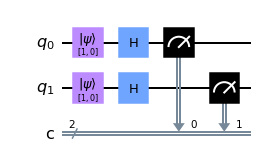

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.h(1)
qc.measure(qr,cr)
qc.draw('mpl')

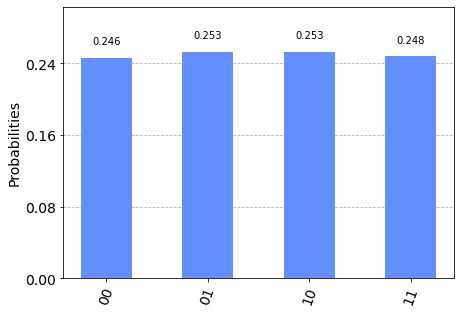

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

परिणामी अवस्था $|\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$ है. 
ऐसा इसलिए हुआ क्योंकि प्रत्येक अवस्था $25\%$ समय परिणाम में दिखाई दी।
आइए आव्यूह संचालन के माध्यम से जांचें

----------------------------------------------
It seems the resulting state is $|\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$. This happens because each state appears in the result $25\%$ of time $(\frac{1}{2}^2 = \frac{1}{4})$. Let's compare this idea through matrix operations

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T;psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T;psi2

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])


## **अभ्यास  ७: मान लीजिए $|-⟩ =\frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}} |1⟩$ है|  $|-⟩ में दो प्रमात्रा द्वयंक प्रारंभ करें, परिणाम को मापें और उन्हें आव्यूह संचालन  के माध्यम से जांचें|**

अवस्था $|-⟩$ में एक प्रमात्रा द्वयंक लगाने के लिए, हम या तो उसमें प्रमात्रा द्वयंक शुरू कर सकते हैं या हम $|1⟩$ में प्रमात्रा द्वयंक शुरू कर सकते हैं और इसे H तर्कद्वार के माध्यम से चला सकते हैं। हम दूसरी प्रक्रिया का उपयोग करेंगे



------------------------------------------------------------------
## **Ex.7: Suppose $|-⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}} |1⟩$. Start two qubits in the state $|-⟩$, measure the results and check them through matrix operations**


To put a qubit in the state $|-⟩$ we can either initialize the qubit in it, or we can initialize the qubit in the state $|1⟩$ and pass it through a Hadamard gate. We'll use the second procedure from here

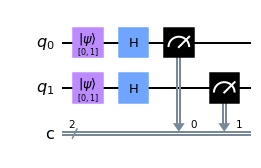

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([0,1],1)
qc.h(0)
qc.h(1)
qc.measure(qr,cr)
qc.draw('mpl')

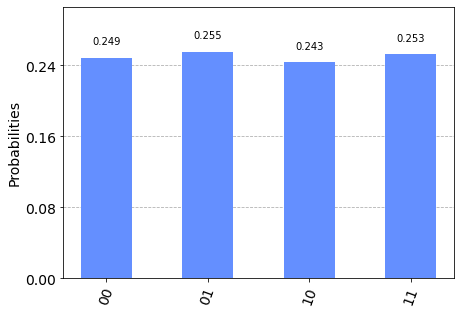

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

परिणामी अवस्था पिछले अभ्यास के समान हैं| लेकिन याद रखें कि $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$ हमारी प्रायिकता  हैं

-----------------------------------------------

It seems the resulting state is similar to the one from the previous exercise. But remember that our probabilities are in fact $|a|^2 = |b|^2 = |c|^2 = |d|^2 = \frac{1}{4}$

In [ ]:
import numpy as np
psi1 = np.array([[0,1]]).T;psi1

array([[0],
       [1]])

In [ ]:
psi2 = np.array([[0,1]]).T;psi2

array([[0],
       [1]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[ 0.5],
       [-0.5],
       [-0.5],
       [ 0.5]])

ऊपर की गई गणनाओं से, हम देख सकते हैं कि इस उदाहरण में परिणामी स्थिति $|\psi_4 ⟩ = \frac{1}{2}|00⟩ - \frac{1}{2}|01⟩ - \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$ 
 है

-----------------------------------------------------------------------------

From the calculations done above we can see that the resulting state in this example is 
$ |\psi_4 ⟩ = \frac{1}{2}|00⟩ - \frac{1}{2}|01⟩ - \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$

## नियंत्रण नकार तर्कद्वार

नियंत्रण नकार तर्कद्वार सबसे महत्वपूर्ण दो प्रमात्रा द्वयंक तर्कद्वार है। यदि नियंत्रण द्वयंक $0$ है, तो लक्ष्य द्वयंक वही रहता है, लेकिन यदि नियंत्रण द्वयंक $1$ है, तो लक्ष्य द्वयंक $0$ से $1$ हो जाता है और $1$ से $0$.

इसलिए
$C|00⟩ = |00⟩, C|01⟩ = |10⟩ , C|10⟩ = |11⟩, C|11⟩ = |10⟩$

आइए इन कार्यों की पुष्टि करें

---------------------------------------------------------------------------

## The CNOT gate

The CNOT (Controlled Not) is the most important two qubits gate. if the control bit is $0$, the target bit remains the same, but if the control bit is $1$ , the target bit is switched from $0$ to $1$ and vice-versa.  

Therfore 
$C|00⟩ = |00⟩, C|01⟩ = |10⟩ , C|10⟩ = |11⟩, $ and  $ C|11⟩ = |10⟩$

Let's confirm these operations


#### $C|00⟩ = |00⟩$

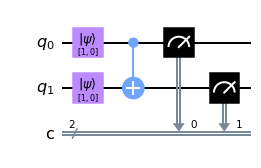

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.cnot(0,1)
qc.measure(qr,cr)
qc.draw('mpl')

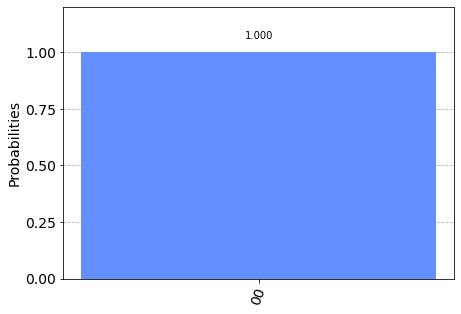

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

नियंत्रण नकार तर्कद्वार को आव्यूह  द्वारा वर्णित किया जा सकता है
$C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{bmatrix}$

----------------------------------------------------

The CNOT gate can be described by the matrix $C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \end{bmatrix}$

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v00 = np.array([[1,0,0,0]]).T;v00

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
# C.v00 = v00
C.dot(v00)

array([[1],
       [0],
       [0],
       [0]])

Now

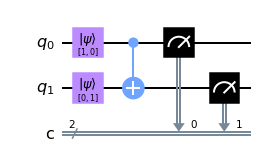

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.cnot(0,1)
qc.measure(qr,cr)
qc.draw('mpl')

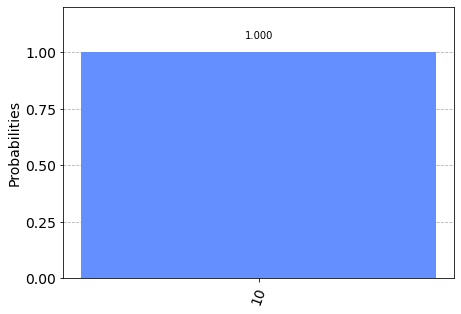

In [ ]:
# Please notice that Qiskit's qubits presentation order is reversed. 
#  Therefore 10 in the histogram's x axis should be read as 01 (from 
#  inside out or right to left).
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v01 = np.array([[0,1,0,0]]).T;v01

array([[0],
       [1],
       [0],
       [0]])

In [ ]:
C.dot(v01)

array([[0],
       [1],
       [0],
       [0]])

#### $C|10⟩ = |11⟩$

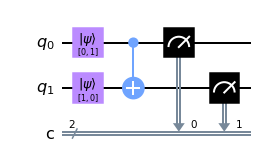

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([1,0],1)
qc.cnot(0,1)
qc.measure(qr,cr)
qc.draw('mpl')

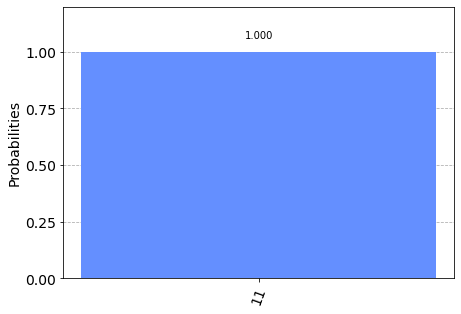

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v10 = np.array([[0,0,1,0]]).T; v10

array([[0],
       [0],
       [1],
       [0]])

In [ ]:
C.dot(v10)

array([[0],
       [0],
       [0],
       [1]])

#### $ C|11⟩ = |10⟩$

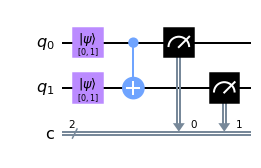

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.initialize([0,1],1)
qc.cnot(0,1)
qc.measure(qr,cr)
qc.draw('mpl')

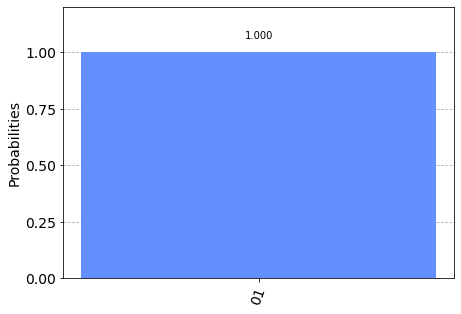

In [ ]:
# Again remember to read qiskit qubits state presentation order 
#  from right to left. Therefore 01 in the x axis is in fact 10
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

In [ ]:
import numpy as np
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
v11 = np.array([[0,0,0,1]]).T; v11

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
# C.v11 = v10
C.dot(v11)

array([[0],
       [0],
       [1],
       [0]])

## **अभ्यास ८: पहली प्रमात्रा द्वयंक को $|+⟩$ स्थिति में और दूसरे को |0⟩ में रखें। उन पर नियंत्रण नकार तर्कद्वार लगायें | पहली प्रमात्रा द्वयंक नियंत्रण के रूप में और दूसरी लक्ष्य के रूप में| परिणाम को मापें और आव्यूह संचालन के साथ उनकी पुष्टि करें।**


------------------------------------------------------

## **Ex.8:Put the first qubit in $|+⟩$ state and the second in |0⟩. pass them through a CNOT gate with the first qubit as control. Measure the result and confirm them with matrix operations.**

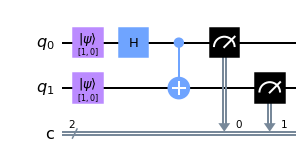

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(2, 'q')
cr = qk.ClassicalRegister(2, 'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr, cr)
qc.draw('mpl')

नीचे दिए गए माप आयतचित्र के आधार पर, परिणामी अवस्था है 
$|\psi⟩ = \frac{1}{\sqrt{2}} |00⟩ + \frac{1}{\sqrt{2}} |11⟩$


--------------------------------------------------------

Based on the measurements histogram below, the resulting state is $|\psi⟩ = \frac{1}{\sqrt{2}} |00⟩ + \frac{1}{\sqrt{2}} |11⟩$

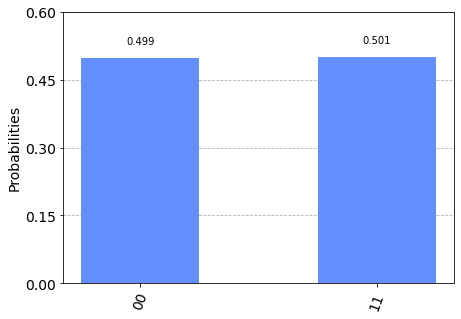

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए आव्यूह गणनाओं के साथ इस परिणाम की पुष्टि करें।


--------------------------------------------------

Let's confirm this result with matrix calculations.

In [ ]:
import numpy as np
va = np.array([[1,0]]).T; va

array([[1],
       [0]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[0.707],
       [0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[0.707],
       [0.   ],
       [0.707],
       [0.   ]])

In [ ]:
C = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]); C

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[0.707],
       [0.   ],
       [0.   ],
       [0.707]])

## **अभ्यास ९: पहली प्रमात्रा द्वयंक को  |+⟩  स्थिति में और दूसरे को |0⟩ में रखें। उन पर नियंत्रण नकार तर्कद्वार लगायें | पहली प्रमात्रा द्वयंक नियंत्रण के रूप में और दूसरी लक्ष्य के रूप में| परिणाम को मापें और आव्यूह संचालन के साथ उनकी पुष्टि करें।**

हमारा परिपथ दो प्रमात्रा द्वयंक से बना है | पहला $|1⟩$ अवस्था में और दूसरा $|0⟩$ अवस्था में है।

पहला प्रमात्रा द्वयंक एच तर्क द्वार के माध्यम से जाता है, इसे $|0⟩$ और $|1⟩$ के अध्यारोपण में रखती है| नियंत्रण नकार तर्कद्वार से गुजरने के बाद, परिणामी अवस्था $|00⟩$ और $|11⟩$ का एक अध्यारोपण है





------------------------------------------------

## **Ex.9: Enatangled states: Put the qubit in the $|-⟩$ state and the second in $|0⟩$ state. Pass them through a CNOT gate with the first qubbit as contol. Measure the results and confirm them with matrix operations**


Our circuit is made of two qubits. The first is put in $|1⟩$ state and the second in state $|0⟩$ . The first qubit goes through the Hadamard gate , putting it in superposition of $|0⟩$ and $|1⟩$. After the two qubits go through a CNOT gate, the resulting state is a superposition of $|00⟩$ and $|11⟩$

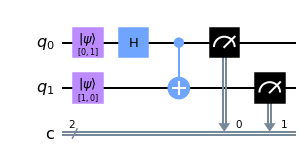

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(2, 'q')
cr = qk.ClassicalRegister(2, 'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([0,1],0)
qc.initialize([1,0],1)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr, cr)
qc.draw('mpl')

नीचे दिए गए आयतचित्र के आधार पर, ऐसा लगता है कि परिणामी स्थिति पिछले वाले के समान है। चूँकि नियंत्रण प्रमात्रा द्वयंक $|1\rangle$ में था, परिणाम बिल्कुल विपरीत होना चाहिए।

$|\psi⟩ = \frac{1}{\sqrt{2}}|00⟩ - \frac{1}{\sqrt{2}}|11⟩$


---------------------------------------------------------------
Based on the measurements histogram below, it seems the resulting state is similar to the previous one. Since the control qubit was in $|1⟩$  the result should be exactly opposite.
$|\psi⟩ = \frac{1}{\sqrt{2}}|00⟩ - \frac{1}{\sqrt{2}}|11⟩$

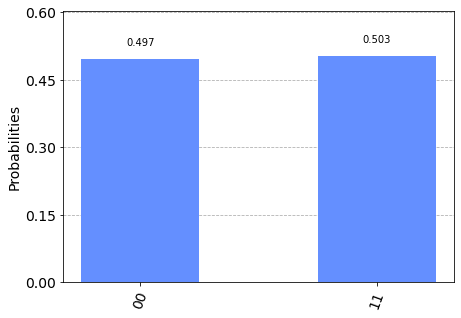

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए हम आव्यूह गणनाओं के साथ इसकी पुष्टि करें


---------------------------------------------------------------
Let's confirm this with matrix operations

In [ ]:
import numpy as np
va = np.array([[0,1]]).T; va

array([[0],
       [1]])

In [ ]:
vb = np.array([[1,0]]).T; vb

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
vaH = H.dot(va); vaH

array([[ 0.707],
       [-0.707]])

In [ ]:
vaHvb = np.kron(vaH,vb); vaHvb

array([[ 0.707],
       [ 0.   ],
       [-0.707],
       [-0.   ]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[ 0.707],
       [ 0.   ],
       [ 0.   ],
       [-0.707]])

In [ ]:
vout = C.dot(vaHvb); vout

array([[ 0.707],
       [ 0.   ],
       [ 0.   ],
       [-0.707]])

## **अभ्यास १०:एक वास्तविक क्वांटम कंप्यूटर में एक सर्किट का निष्पादन**

सबसे पहले हमें [वेबसाइट](https://quantum-computing.ibm.com) पर जाना होगा, रजिस्टर करना होगा और पायथन कोड के लिए अपना एपीआई प्राप्त करना होगा। हम उस एपीआई को अपने लोकल उपकरण में सहेज कर रख सकते हैं।

-------------------------------------------------------------
## **Ex.10:Executing a circuit in a real IBM quantum computer**

First we must go to the [website](https://quantum-computing.ibm.com) , register and get our API for python code. We can save that api key in our local device and can run the code on actual quantum computer.

In [ ]:
# Get the IBM API key in: https://quantum-computing.ibm.com
# chave = 'My key is already saved in this environment'
# qk.IBMQ.save_account(chave)

In [ ]:
# Load the account in the active session
qk.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-07-25 13:27:18,085: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
# The default provider is é hub='ibm-q', group='open, project='main'
# The code below is executed as an example
provider_1 = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# In the public provider we will use a cloud simulator.
backend_1 = provider_1.get_backend('ibmq_qasm_simulator')

In [ ]:
# The provider listed below has unlimited jobs
provider_2 = qk.IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# For this provider we will use the ibmq_jakarta machine
backend_2 = provider_2.get_backend('ibmq_manila')

आइए $0$ और $7$ के बीच एक यादृच्छिक संख्या उत्पन्न करें। इसके लिए हमें $3$ प्रमात्रा द्वयंक  की आवश्यकता है प्रत्येक प्रमात्रा द्वयंक  बेतरतीब ढंग से एक संख्या $0$ या $1$ उत्पन्न करेगा। अंत में हम तीन $1$ अंकों की द्विचर संख्याओं को एक $3$ अंकों की द्विचर संख्या में जोड़ते हैं और फिर इसे दशमलव आधार में परिवर्तित करते हैं

-------------------------------------------------

Let's generate a random number between $0$ and $7$. For this we need $3$ qubits Each qubit will randomly generate a number $0$ or $1$. At the end we combine the three $1$ digit binary numbers into a $3$ digit binary number and then convert it to decimal base

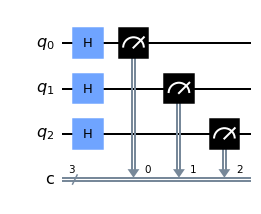

In [ ]:
# With n Qubits we can generate a random number from 0 to 2^n - 1
n = 3

qr = qk.QuantumRegister(n,'q')
cr = qk.ClassicalRegister(n,'c')
qc = qk.QuantumCircuit(qr, cr)

# Applying a Hadamard to each of the three qubits
for i in range(n):
  qc.h(i)

# Measuring the three qubits
qc.measure(qr,cr)

# Visualizing the circuit
qc.draw('mpl') 

In [ ]:

new_job = qk.execute(qc, backend_2, shots=1)

कोड निष्पादित होने के बाद, परिणाम उसी में वापस किया जाता है जैसे स्थानीय सिमुलेशन में, एक पायथन शब्दकोश के माध्यम से


---------------------------------------------------
After the code is executed, the result is returned in the same was as in a local simulation, via a python dictionary

In [ ]:
# this result is stored on the local machine. However, it will only be available 
# after the job has been executed. It returns a python dictionary.
new_job.result().get_counts()

{'000': 1}

अंतिम चरण डिक्शनरी बाइनरी कुंजी को दशमलव संख्या में बदलना है


-------------------------------------------------------------


The last step is to convert the dictionary binary key in a decimal number 

In [ ]:
int(list(new_job.result().get_counts().keys())[0],2)

0

## **अभ्यास  ११:  बनाएं, निष्पादित करें, दो बार अनुकरण करें और एक ही सेल में प्रमात्रा  परिपथ के गणना परिणामों का मुद्रण करें।**

-----------------------------------------------------------

## **Ex.11: Create, execute, simulate twice and print the counts results of a quantum circuit in the same cell.**

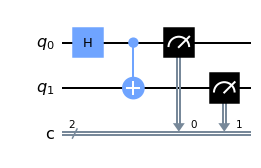

{'11': 523, '00': 477}
{'00': 486, '11': 514}


In [ ]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure([0,1], [0,1])
display(circuit.draw('mpl'))

from qiskit.providers.aer import AerSimulator
print(AerSimulator().run(circuit, shots=1000).result().get_counts())
print(AerSimulator().run(circuit, shots=1000).result().get_counts())

## **अभ्यास  १२:केवल एक सेल में तीन प्रमात्रा द्वयंक के साथ प्रमात्रा  परिपथ के गिनती परिणाम बनाएं, निष्पादित करें, अनुकरण करें और प्रस्तुत करें। लूप के लिए उपयोग करके माप द्वार डालें**

-------------------------------------------

## **Ex.12:Create, execute, simulate and present the counting result of a quantum circuit with three qubits in only one cell. Insert the measurement gates using for loop**

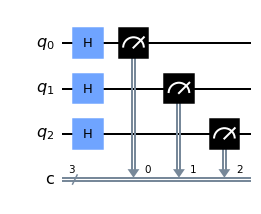

{'010': 124,
 '110': 136,
 '100': 116,
 '101': 123,
 '001': 118,
 '011': 130,
 '000': 129,
 '111': 124}

In [ ]:
from qiskit import QuantumCircuit
circuito = QuantumCircuit(3,3)
for i in range(3):
  circuito.h(i)
  circuito.measure(i,i)
display(circuito.draw('mpl'))

from qiskit.providers.aer import AerSimulator
AerSimulator().run(circuito, shots = 1000).result().get_counts()

## **अभ्यास  १३: चार प्रमात्रा द्वयंक के साथ प्रमात्रा  परिपथ के गिनती परिणाम बनाएं, निष्पादित करें, अनुकरण करें और प्रस्तुत करें। एक सूची का उपयोग कर माप द्वार डालें।**

------------------------------------------

## **Ex.13: Create, execute, simulate and present the counting result of a quantum circuit with four qubits. Insert the measurement gates using a python list.**

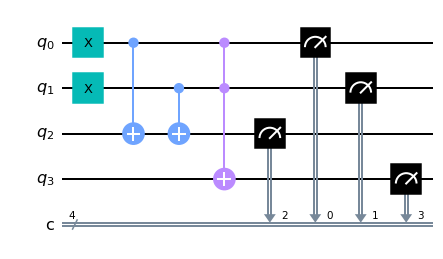

{'1011': 10000}

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4,4)
qc.x([0,1])
qc.cx([0,1],[2,2])
qc.ccx(0,1,3)
qc.measure([0,1,2,3],[0,1,2,3])
display(qc.draw(output='mpl'))

from qiskit.providers.aer import AerSimulator
AerSimulator().run(qc, shots = 10000).result().get_counts()

## **अभ्यास १४:एक प्रमात्रा द्वयंक, एक  द्वयंक, एक नकार तर्कद्वार और एक माप के साथ एक  परिपथ बनाएं। माप से पहले प्रमात्रा द्वयंक , परिपथ परिवर्तन आव्यूह और $१०$ मापों का आयतचित्र प्रस्तुत करें**

-----------------------------------------------------------

## **Ex.14: Create a circuit with one qubit, one bit, a NOT gate and a measure. Present the qubit vector , the circuit transformation matrix before measurement and the histogram of 10 measurements**

Circuit 1 - Registers Only


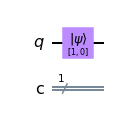

Circuit 1 - Quantum Register with a Gate X 


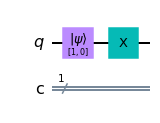

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)

print("Circuit 1 - Registers Only")
display(qc.draw('mpl'))
qc.x(qr)

print("Circuit 1 - Quantum Register with a Gate X ")
display(qc.draw('mpl'))

Quantum Register Vector State


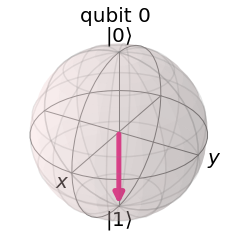

Transformation Matrix (up to this stage)
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:
job = qk.execute(experiments = qc, 
                 backend = qk.Aer.get_backend('statevector_simulator'))
result1 = job.result().get_statevector()

print("Quantum Register Vector State")
from qiskit.tools.visualization import plot_bloch_multivector
display(plot_bloch_multivector(result1))

job = qk.execute(experiments = qc,
                 backend = qk.Aer.get_backend('unitary_simulator'))

print("Transformation Matrix (up to this stage)")
print(job.result().get_unitary())


Circuit 1 - Registers, Gate X and Quantum Register Measure


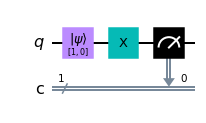

Quantum Register Thousand Measures
{'1': 1000}

Result's Histogram


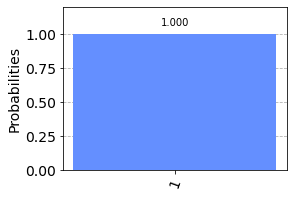

In [ ]:
qc.measure(qr, cr)
print()
print("Circuit 1 - Registers, Gate X and Quantum Register Measure")
display(qc.draw('mpl'))

print("Quantum Register Thousand Measures")
job = qk.execute(experiments = qc, 
                 backend = qk.Aer.get_backend('statevector_simulator'),
                 shots = 1000)
print(job.result().get_counts())

print()
print("Result's Histogram")
from qiskit.tools.visualization import plot_histogram
plot_histogram(data = job.result().get_counts(), figsize=(4,3))

## टेलीपोर्टेशन परिपथ

आइए तीन प्रमात्रा द्वयंक, तीन द्वयंक के साथ एक परिपथ बनाएं और प्रत्येक को $|0\rangle$ स्थिति में प्रारंभ करें

हम `Statevector` वर्ग का उपयोग करेंगे। हम प्रत्येक प्रमात्रा द्वयंक के ब्लॉक क्षेत्र को भी देखेंगे। गोले को उल्टे क्रम में प्रस्तुत किया जाएगा, बाईं ओर सबसे महत्वपूर्ण द्वयंक के साथ|

-----------------------------------------------------------

## Teleportation Circuit

Let's create a circuit with three qubits, three classical registers and initialize each in $|0\rangle$ state 

We will use the class `Statevector` . We will also look at the block sphere of each qubit. The spheres will be presented in reverse order, with the most significant bit on the left 

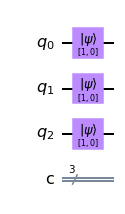

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


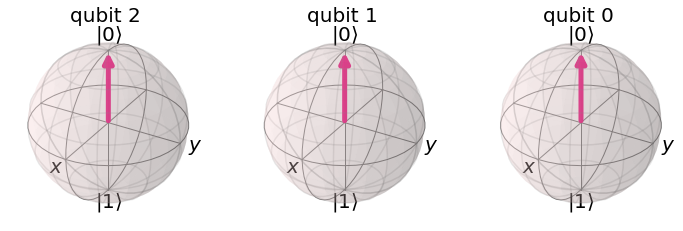

In [ ]:
import qiskit as qk
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
qr = qk.QuantumRegister(3,'q')
cr = qk.ClassicalRegister(3,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([1,0],2)
display(qc.draw('mpl'))

sv = Statevector.from_label('000')
state_data = lambda qc,sv: np.round(np.asarray(sv.evolve(qc).data),4)
state_bloch = lambda qc,sv: plot_bloch_multivector(sv.evolve(qc).data, reverse_bits=True)

print(state_data(qc,sv))
state_bloch(qc,sv)

प्रमात्रा द्वयंक $q_0$ . पर $X$ परिपथ लगाकर जटिलता बढ़ाएँ

--------------------------------------------------------------------




Increase the complexity by inserting an $X$ gate on qubit $q_0$

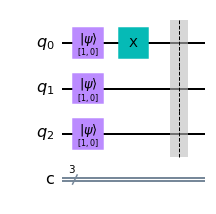

[0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


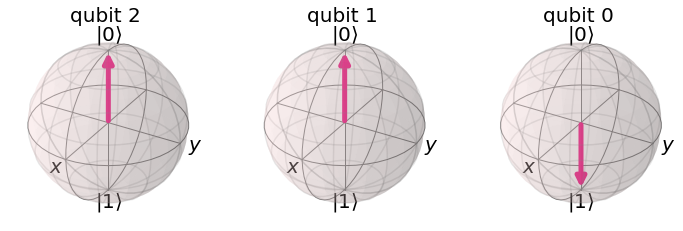

In [ ]:
qc.x(0)
qc.barrier()
display(qc.draw('mpl'))

print(state_data(qc,sv))
display(state_bloch(qc,sv))

आइए $q_1$ को $|+\rangle$ , में रखें

--------------------------------------------
Let's put the qubit $q_1$ in state $|+\rangle$

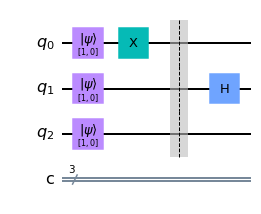

[0.   +0.j 0.707+0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.   +0.j]


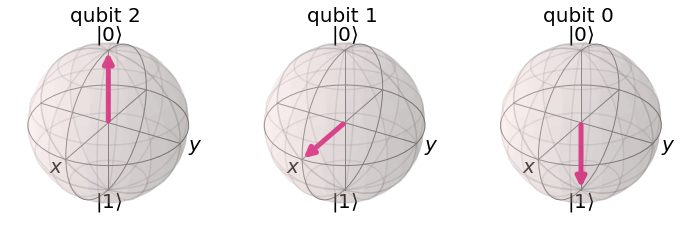

In [ ]:
qc.h(1)
display(qc.draw('mpl'))

print(state_data(qc,sv))
state_bloch(qc,sv)

$q_1$ पर नियंत्रण के साथ एक नियंत्रित नकार तर्कद्वार डालें और $q_2$ पर लक्ष्य रखें। यह उन्हें $|\psi⟩ = \frac{1}{\sqrt{2}}(|00\rangle + |11⟩)$ स्थिति में ला देगा | तीन प्रमात्रा द्वयंक  $|\psi⟩ = \frac{1}{\sqrt{2}}(|001⟩ + |111⟩)$ स्थिति में होंगे

------------------------------------------------------------

Insert a CNOT gate with qubit $q_1$ as control and $q_2$ as target. This will enatngle them in the state $|\psi⟩ = \frac{1}{\sqrt{2}}(|00\rangle + |11⟩)$. The three qubits will be in state $|\psi⟩ = \frac{1}{\sqrt{2}}(|001⟩ + |111⟩)$

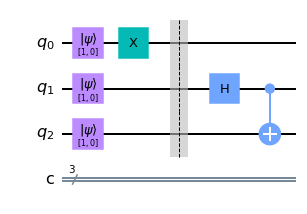

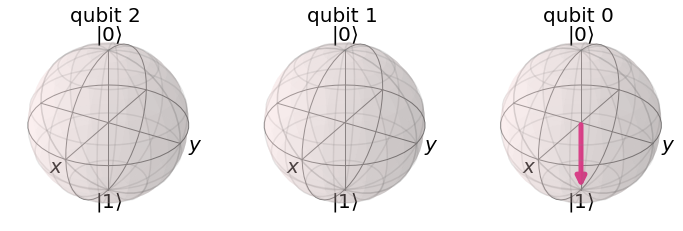

In [ ]:
qc.cnot(1,2)
display(qc.draw("mpl"))

state_data(qc,sv)
state_bloch(qc,sv)

अब एक और  नियंत्रण नकार तर्कद्वार जोड़ें, इस बार $q_0$ और $q_1$ के बीच।

---------------------------------------------------------------------------------


Now add another CNOT gate, this time between $q_0$ and $q_1$.

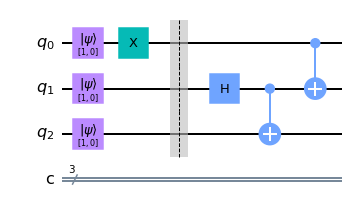

array([0.   +0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j, 0.   +0.j, 0.707+0.j,
       0.   +0.j, 0.   +0.j])

In [ ]:
qc.cnot(0,1)
display(qc.draw('mpl'))
state_data(qc,sv)

$q_0$ में $H$ तर्कद्वार डालें और एक अवरोध

-------------------------------------------------
Insert H Gate in $q_0$ and a barrier

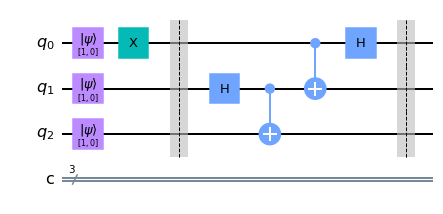

array([ 0. +0.j,  0. +0.j,  0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j,
        0. +0.j,  0. +0.j])

In [ ]:
qc.h(0)
qc.barrier()
display(qc.draw('mpl'))
state_data(qc,sv)

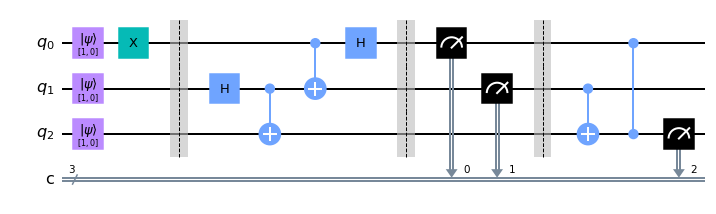

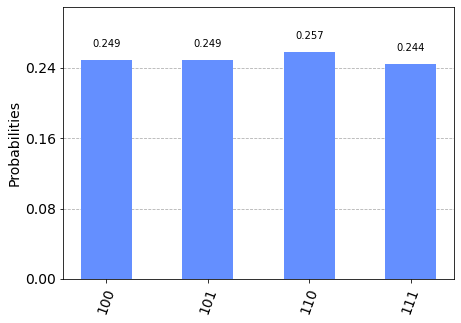

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cnot(1,2)
qc.cz(0,2)
qc.measure(2,2)
display(qc.draw('mpl'))

simulador = qk.Aer.get_backend('statevector_simulator')
resultado = qk.execute(qc, simulador, shots=10000).result()
qk.visualization.plot_histogram(resultado.get_counts())

## आव्यूह संचालन के माध्यम से  प्रमात्रा अभिकलन

------------------------------------------------------------------

## Quantum Computing with Matrices Exercises

## **अभ्यास १ : $V = \begin{bmatrix} 3 + 2\iota \\ 4 - 2 \iota \end{bmatrix}$  को $|0⟩$ और $|1⟩$ के योग के रूप में लिखिए**


---------------------------------------------------------------------






## **Ex.1: Write $V = \begin{bmatrix} 3 + 2\iota \\ 4 - 2 \iota \end{bmatrix}$ as a sum of $|0⟩$ and $|1⟩$**



In [ ]:
import numpy as np

V = np.array([[3+2j],[4-2j]])
modV = np.real(V.T.conjugate().dot(V)[0,0])**0.5
Vn = V/modV; Vn

array([[0.522+0.348j],
       [0.696-0.348j]])

In [ ]:
v0 = np.array([[1,0]]).T
v1 = np.array([[0,1]]).T
Vn[0,0]*v0 + Vn[1,0]*v1

array([[0.522+0.348j],
       [0.696-0.348j]])

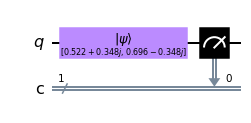

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q')
cr = qk.ClassicalRegister(1,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([Vn[0,0],Vn[1,0]],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

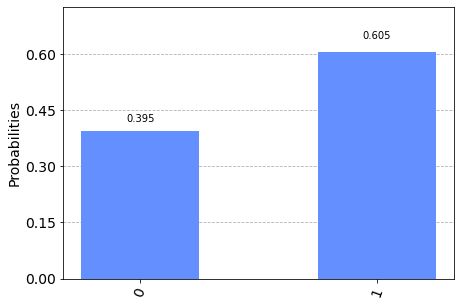

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

In [ ]:
Vn[0,0].conjugate()*Vn[0,0]

(0.39393939393939403+0j)

In [ ]:
Vn[1,0].conjugate()*Vn[1,0]

(0.6060606060606062+0j)

## **अभ्यास  २: आव्यूहों का प्रयोग करके सिद्ध कीजिए कि नियंत्रित नकार तर्कद्वार इसका अपना प्रतिलोम है। $H$ तर्कद्वार के लिए भी ऐसा ही करें**

----------------------------------------------------------

## **Ex.2: Using matrices, prove that the CNOT gate is its own inverse. Do the same for Hadamard gate** 

In [ ]:
import numpy as np
CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]])
CNOT.dot(CNOT)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
import numpy as np
H = np.array([[1,1],[1,-1]])/2**0.5
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

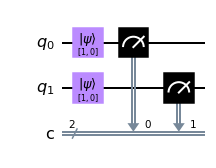

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.measure(qr,cr)
qc.draw('mpl')

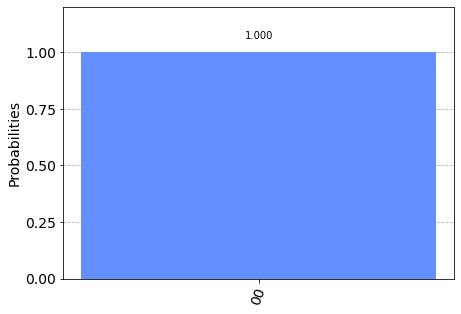

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

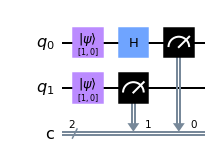

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.measure(qr,cr)
qc.draw('mpl')

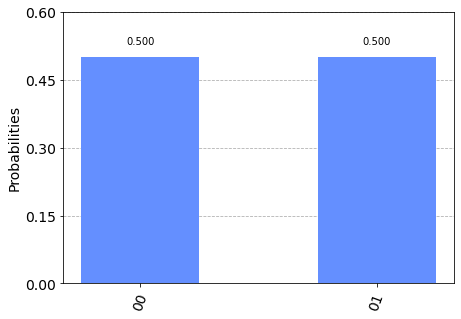

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

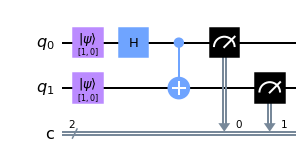

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw('mpl')

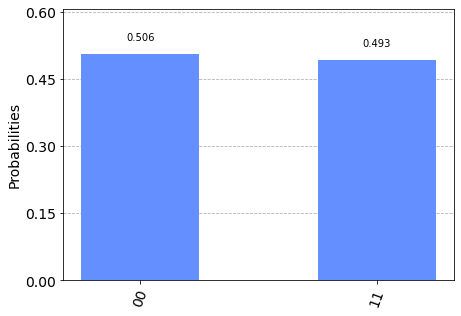

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

हम तर्कद्वार को उल्टे क्रम लागू करते हैं
 और देखें कि हिस्टोग्राम खुद को दोहराते हैं?

--------------------------------------------------
Now , let's apply the gates in reverse order and see that the histograms repeat themselves.

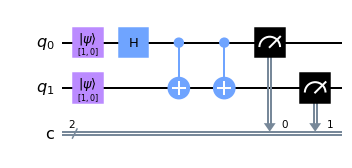

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.cnot(qr[0],qr[1])
qc.cnot(qr[0],qr[1])
qc.measure(qr,cr)
qc.draw('mpl')

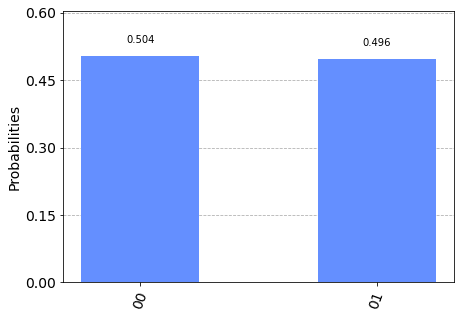

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

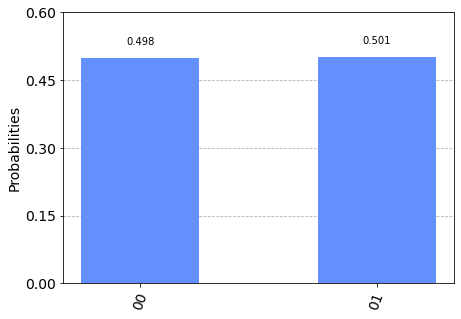

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

## **अभ्यास  ३: $X$, $Y$, और $Z$ पाउली आव्यूहों को प्रस्तुत करें**

------------------------------------------------------
## **Ex.3: Present the $X$, $Y$, and $Z$ pauli matrices**

In [ ]:
import numpy as np
X = np.array([[0,1],
              [1,0]])
X

array([[0, 1],
       [1, 0]])

In [ ]:
X.conj().T.dot(X)

array([[1, 0],
       [0, 1]])

In [ ]:
Y = np.array([[0,-1j],
              [1j,0]])
Y

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [ ]:
Y.conj().T.dot(Y)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [ ]:
Z = np.array([[1,0],
              [0,-1]])
Z

array([[ 1,  0],
       [ 0, -1]])

In [ ]:
Z.conj().T.dot(Z)

array([[1, 0],
       [0, 1]])

## **अभ्यास  ४:दर्शाइए कि $H = \frac{1}{\sqrt{2}}(X + Z),\\ X = H.Z.H,\\ Z = H.X.H,\\ Y = -H.Y.H$**

--------------------------------------------

## **Ex.4: Show that $H = \frac{1}{\sqrt{2}}(X + Z),\\ X = H.Z.H,\\ Z = H.X.H,\\ Y = -H.Y.H$**

In [ ]:
H = (X+Z)/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
H.dot(Z).dot(H)

array([[-0.,  1.],
       [ 1., -0.]])

In [ ]:
H.dot(X).dot(H)

array([[ 1., -0.],
       [ 0., -1.]])

In [ ]:
-H.dot(Y).dot(H)

array([[-0.+0.j, -0.-1.j],
       [-0.+1.j, -0.-0.j]])

## **अभ्यास  ५:एस, टी, स्वैप आव्यूहों को प्रस्तुत करें**

------------------------------------------------

## **Ex.5:Present the $S$, $T$, $SWAP$ matrix**

In [ ]:
import numpy as np
S = np.array([[1,0],
              [0,1j]])
S

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

In [ ]:
S.conj().T.dot(S)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [ ]:
T = np.array([[1,0],
              [0,np.exp(1j*np.pi/4)]])
T


array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

In [ ]:
T.conj().T.dot(T)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [ ]:
S = np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]]); S

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
S.dot(v00)

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
S.dot(v01)

array([[0],
       [0],
       [1],
       [0]])

In [ ]:
S.dot(v10)

array([[0],
       [1],
       [0],
       [0]])

In [ ]:
S.dot(v11)

array([[0],
       [0],
       [0],
       [1]])

## **अभ्यास  ६:दर्शाइए कि $S_{ij} = C_{ij}.C_{ji}.C_{ij}$**

---------------------------------------
## **Ex.6: Show that $S_{ij} = C_{ij}.C_{ji}.C_{ij}$**





In [ ]:
C_ = np.array([[1,0,0,0],
               [0,0,0,1],
               [0,0,1,0],
               [0,1,0,0]]);C_

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [ ]:
C_ = np.array([[1,0,0,0],
               [0,0,0,1],
               [0,0,1,0],
               [0,1,0,0]]);C_

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [ ]:
C.dot(C_).dot(C)

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

## **अभ्यास  ७: प्रक्षेपण प्रचालक को प्रस्तुत करें और सिद्ध कीजिए  $n^2 = n, nn' = 0, n+ n' = I, nX = Xn'$**

-------------------------------------
## **Ex.7: Present the projection operators and prove $n^2 = n, nn' = 0, n+ n' = I, nX = Xn'$**

In [ ]:
v = v0 + v1; v

array([[1],
       [1]])

In [ ]:
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n.dot(v)

array([[0],
       [1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:
I2 = np.identity(2); I2

array([[1., 0.],
       [0., 1.]])

In [ ]:
I2 - n

array([[1., 0.],
       [0., 0.]])

In [ ]:
n_.dot(v)

array([[1],
       [0]])

In [ ]:
n.dot(n)

array([[0, 0],
       [0, 1]])

In [ ]:
n_.dot(n_)

array([[1, 0],
       [0, 0]])

In [ ]:
n.dot(n_)

array([[0, 0],
       [0, 0]])

In [ ]:
n_.dot(n)

array([[0, 0],
       [0, 0]])

In [ ]:
n.dot(X)

array([[0, 0],
       [1, 0]])

In [ ]:
n+n_

array([[1, 0],
       [0, 1]])

In [ ]:
X.dot(n_)

array([[0, 0],
       [1, 0]])

## **अभ्यास  ८: व्यंजक $S_{ij} = n_i n_j + n_i^{'} n_j^{'} + X_i X_j (n_i n^{'}_j + n^{'}_i + n_j)$ का विश्लेषण करें**


--------------------------------------------------------------------------------

## **Ex.8: Analyze the expression $S_{ij} = n_i n_j + n_i^{'} n_j^{'} + X_i X_j (n_i n^{'}_j + n^{'}_i + n_j)$**

In [ ]:
import numpy as np
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:

np.kron(n,n)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
np.kron(n_,n_)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n,n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n_,n)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(X,X)

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
np.kron(X,X).dot(np.kron(n,n_)+np.kron(n_,n))

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n,n) + np.kron(n_,n_) + np.kron(X,X).dot(np.kron(n,n_)+np.kron(n_,n))

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
np.kron(n,n)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1]])

In [ ]:
np.kron(n_,n_)

array([[1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n_,n)

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n,n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

In [ ]:
nn = np.kron(n,n)
nn_ = np.kron(n,n_)
n_n = np.kron(n_,n)
n_n_ = np.kron(n_,n_)
nn + nn_ + n_n + n_n_

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

## **अभ्यास  ९: सिद्ध कीजिए कि $(n\otimes n) \cdot (n' \otimes n') = 0$**

--------------------------------------------------------

## **Ex.9: Prove that $(n\otimes n) \cdot (n' \otimes n') = 0$**

In [ ]:
import numpy as np
n = np.array([[0,0],[0,1]]); n

array([[0, 0],
       [0, 1]])

In [ ]:
n_ = np.array([[1,0],[0,0]]);n_

array([[1, 0],
       [0, 0]])

In [ ]:
#(n x n).(n_ x n_)
np.kron(n,n).dot(np.kron(n_,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n,n).dot(np.kron(n_,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
np.kron(n.dot(n_),n.dot(n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
nn.dot(n_n_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# (n_ x n).(n x n_)
np.kron(n_,n).dot(np.kron(n,n_))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
n_n.dot(nn_)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
# (n x n_).(n_ x n)
np.kron(n, n_).dot(np.kron(n_,n))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [ ]:
n_n_.dot(nn)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])


## आव्यूहों के साथ चिरसम्मत अभिकलन


-----------------------------------------
## Classical Computing with Matrices

In [ ]:
NOT = np.array([[0,1],[1,0]]); NOT

array([[0, 1],
       [1, 0]])

In [ ]:
D0 = np.array([[1],[0]])
D1 = np.array([[0],[1]])

In [ ]:
NOT.dot(D0)

array([[0],
       [1]])

In [ ]:
NOT.dot(D1)

array([[1],
       [0]])

In [ ]:
AND = np.array([[1,1,1,0],[0,0,0,1]]); AND

array([[1, 1, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
AND.dot(np.kron(D0,D0))

array([[1],
       [0]])

In [ ]:
AND.dot(np.kron(D0,D1))

array([[1],
       [0]])

In [ ]:
AND.dot(np.kron(D1,D0))

array([[1],
       [0]])

In [ ]:
AND.dot(np.kron(D1,D1))

array([[0],
       [1]])

In [ ]:
OR = np.array([[1,0,0,0],[0,1,1,1]]); OR

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

In [ ]:
OR.dot(np.kron(D0,D0))

array([[1],
       [0]])

In [ ]:
OR.dot(np.kron(D0,D1))

array([[0],
       [1]])

In [ ]:
OR.dot(np.kron(D1,D0))

array([[0],
       [1]])

In [ ]:
OR.dot(np.kron(D1,D1))

array([[0],
       [1]])

In [ ]:
NAND = np.array([[0,0,0,1],[1,1,1,0]]); NAND

array([[0, 0, 0, 1],
       [1, 1, 1, 0]])

In [ ]:
NOT.dot(AND)

array([[0, 0, 0, 1],
       [1, 1, 1, 0]])

In [ ]:
NOR = np.array([[0,1,1,1],[1,0,0,0]]);NOR

array([[0, 1, 1, 1],
       [1, 0, 0, 0]])

In [ ]:
NOT.dot(OR)

array([[0, 1, 1, 1],
       [1, 0, 0, 0]])

In [ ]:
np.kron(NOT,AND)

array([[0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
OR.dot(np.kron(NOT,AND))


array([[0, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 0, 0, 1]])

In [ ]:
NOT.dot(AND).dot(np.kron(NOT,NOT))

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

In [ ]:
OR

array([[1, 0, 0, 0],
       [0, 1, 1, 1]])

In [ ]:
NOT.dot(OR).dot(np.kron(NOT,NOT))

array([[1, 1, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
AND

array([[1, 1, 1, 0],
       [0, 0, 0, 1]])

In [ ]:
import numpy as np
k = np.kron
XOR = np.array([[1,0,0,1],
                [0,1,1,0]])
AND = np.array(([1,1,1,0],
                [0,0,0,1]))
k(XOR,AND)

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
def criaCompat(nbits,nvezes):
  nlins = 2**(nbits*nvezes)
  ncols = 2**nbits
  compat = np.zeros(nlins*ncols).reshape(nlins,ncols)
  for i in range(ncols):
   formato = "0" + str(nbits) + "b"
   binario = format(i,formato)*nvezes
   decimal = int(binario,2)
   compat[decimal,i] = 1
  return(compat)

criaCompat(2,2)


array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
k(XOR,AND).dot(criaCompat(2,2))

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.]])

In [ ]:
import numpy as np
k = np.kron 

def criaCompat(nbits,nvezes):
  nlins = 2**(nbits*nvezes)
  ncols = 2**nbits
  compat = np.zeros(nlins*ncols).reshape(nlins,ncols)
  for i in range(ncols):
   formato = "0" + str(nbits) + "b"
   binario = format(i,formato)*nvezes
   decimal = int(binario,2)
   compat[decimal,i] = 1
  return(compat)

criaCompat(2,2)

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
NOT = np.array([[0,1],
                [1,0]])

AND3 = np.array([[1,1,1,1,1,1,1,0],
                 [0,0,0,0,0,0,0,1]])

OR4 = np.array([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

I2 = np.array([[1,0],
               [0,1]])

t1z = k(NOT,k(NOT,I2))
t2z = k(NOT,k(I2,NOT))
t3z = k(I2,k(NOT,NOT))
t4z = k(I2,k(I2,I2))
ORz = k(AND3,k(AND3,k(AND3,AND3)))
ORz = OR4.dot(ORz).dot(k(t1z,k(t2z,k(t3z,t4z))))

t1c = k(NOT,k(I2,I2))
t2c = k(I2,k(NOT,I2))
t3c = k(I2,k(I2,NOT))
t4c = k(I2,k(I2,I2))
ORc = k(AND3,k(AND3,k(AND3,AND3)))
ORc = OR4.dot(ORc).dot(k(t1c,k(t2c,k(t3c,t4c))))

compat = criaCompat(3,8)
k(ORz,ORc).dot(compat)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import numpy as np
TOFFOLI = np.array([[1,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,0],
                    [0,0,0,1,0,0,0,0],
                    [0,0,0,0,1,0,0,0],
                    [0,0,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,1,0]])
TOFFOLI.dot(TOFFOLI)

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
Z1 = np.array([[0,0,0,0,0,0,0,0],
               [0,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0],
               [0,0,0,1,0,0,0,0],
               [0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,0,0],
               [0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1]])
Z1

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
ZpY = np.zeros([8,8])
ZpY[0,0] = 1; ZpY[1,2] = 1; ZpY[2,1] = 1; ZpY[3,3] = 1
ZpY[4,4] = 1; ZpY[5,6] = 1; ZpY[6,5] = 1; ZpY[7,7] = 1
ZpY

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
Z1I4 = np.array([[0,0,0,0],
                 [1,0,0,0],
                 [0,0,0,0],
                 [0,1,0,0],
                 [0,0,0,0],
                 [0,0,1,0],
                 [0,0,0,0],
                 [0,0,0,1]])
TOFFOLI.dot(ZpY).dot(TOFFOLI).dot(Z1I4)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
Zfim = np.array([[1,0,1,0,1,0,1,0],
                 [0,1,0,1,0,1,0,1]])

In [ ]:
Zfim = np.array([[1,0,1,0,1,0,1,0],
                 [0,1,0,1,0,1,0,1]])

In [ ]:
Zfim.dot(TOFFOLI).dot(ZpY).dot(TOFFOLI).dot(Z1I4)

array([[1., 0., 0., 0.],
       [0., 1., 1., 1.]])

In [ ]:
import numpy as np
fred = np.identity(8)
fred[5,5] = 0; fred[5,6] = 1
fred[6,5] = 1; fred[6,6] = 0
fred

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
fred.dot(fred)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import numpy as np
Fy0 = np.zeros([8,4])
Fy0[0,0] = 1; Fy0[1,1] = 1; Fy0[4,2] = 1; Fy0[5,3] = 1
Fy0

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
xYz = np.array([[1,1,0,0,1,1,0,0],
                [0,0,1,1,0,0,1,1]])

In [ ]:
xYz.dot(fred).dot(Fy0)

array([[1., 1., 1., 0.],
       [0., 0., 0., 1.]])